Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import re
import os
from scipy import stats
from scipy.stats import zscore

%matplotlib inline
import matplotlib.pyplot as plt 


#### Part 1: Experiment design

**Challenge**
Since the professional photography service consumes so many operational and financial resources, AirBnB management are unsure if they should continue. AirBnB management have asked the Data Science team to analyse the impact of the professional photography service in order to determine whether or not they should continue funding the service.

Provide full details about how you will run experiments to assess the impact of this service on both hosts and guests. How will you ensure that the experiments are valid and not biased?

### Method 1- Data analysis over historical data

**Step 1 - Acquire data from previous years**

**Key metrics** : conversion rate on host offer i.e. percentage of actual bookings among all the people who consulted the offer

**Key question** : do professional pictures greatly increase the conversion rate ?

Comparing data from previous years of flats with professional pictures (i.e test group) VS. flats with homemade pictures (i.e. control group) to measure whether the test group is outperforming in terms of booking.

**Methodology**
- select  sample of flats with professional pictures = test group
- compare results over past years with comparable listings (equivalent flats in terms of pricing, location, accomodations etc.) in order to measure whether, for comparable flats, those with Porfessional Pictures outperformed Control Group


In order to be significant and unbiased, the analysis should be done over a long time period, in order to avoid seasonality biases.


**Possibility to produce an Hypothesis testing procedure**

Null Hypothesis Ho = Professional Pictures have important impact over flat booking

Ha = Professional Pictures have no impact whatsoever over flat booking

If normally distributed, the p-value calculation would outcome a particular value: 
- if p-value is very low, one may assume that the dataset provided is not due to chance, therefore the null hypothesis may be rejected
- if p-value is very high, one may assume that the dataset provided IS due to chance, therefore the null hypothesis may not be rejected

If Null Hypothesis rejected, one may conclude that Professional Pictures don't have strong impact and should be removed

### Method 2 - A/B Testing

An A/B Testing methodology can be applied.
If AirBnB is ready to pay for Professional pictures for a group of flats, it may create test over the same falt offers with and without those professional pictures.

**Key metrics** : conversion rate on host offer i.e. percentage of actual bookings among all the people who consulted the offer

**Key question** : do professional pictures greatly increase the conversion rate ?

For the same sample of flats where professional pictures are available, ask Hosts to take smartphone made picture in order to have 2 offer versions to test :

- Control group will be exposed to smartphone made pictures
- Test Group will be exposed to Host pages with Professional pictures


**Sample size**
Traditional A/B tests may be done over a 50/50 split of users

**Analysis**
Letting running the test for a relatively important time period (at least 30 days), in order to get significative results, it is possible to compare both results at the end of the tests.

Once again, hypothesis testing with p-values calculation may be done to measure whether results are due to chance or not.

Depending whether the Test Group outperformed the Control Group in terms of transformation rate and complete booking experiences, one may conclude over great impact of Professional pictures.

Possible to assess that homemade pictures are efficient advertisment and get rid of the Professional Photographer.

# Part 2: Result analysis - Hail App Challenge

**Background**

A ride hailing app currently assigns new incoming trips to the closest available vehicle. To compute such distance, the app currently computes haversine distance between the pickup point and each of the available vehicles. We refer to this distance as linear.

However, the expected time to reach A from B in a city is not 100% defined by Haversine distance: cities are known to be places where huge amount of transport infrastructure (roads, highways, bridges, tunnels) is deployed to increase capacity and reduce average travel time. Interestingly, this heavy investment in infrastructure also implies that bird distance does not work so well as proxy, so the isochrones for travel time from certain location drastically differ from the perfect circle defined by bird distance, as we can see in this example from CDMX where the blue area represents that it is reachable within a 10 min drive.

<img src='https://camo.githubusercontent.com/3d594b4745625f6ba578fbeaeb2e7010711ed8ba/68747470733a2f2f692e696d6775722e636f6d2f6859586870694d2e706e67' >

In addition to this, travel times can be drastically affected by traffic, accidents, road work...So that even if a driver is only 300m away, he might need to drive for 10 min because of road work in a bridge.

**Proposal**
In order to optimise operations, engineering team has suggested they could query an external real time maps API that not only has roads, but also knows realtime traffic information. We refer to this distance as road distance.

In principle this assignment is more efficient and should outperform linear. However, the queries to the maps API have a certain cost (per query) and increase the complexity and reliability of a critical system within the company. So Data Science team has designed an experiment to help engineering to decide.

**Experimental design**
The designed experiment is very simple. For a period of 5 days, all trips in 3 cities (Bravos, Pentos and Volantis) have been randomly assigned using *linear or road* distance:

Trips whose *trip_id* starts with digits 0-8 were assigned using road distance.
Trips whose *trip_id* starts with digits 9-f were assigned using linear distance.

**Data description**
The collected data is available in [this link](https://www.dropbox.com/s/e3j1pybfz5o3vq9/intervals_challenge.json.gz?dl=0). 
Each object represent a vehicle_interval that contains the following attributes:

type: can be going_to_pickup, waiting_for_rider or driving_to_destination.
trip_id: uniquely identifies the trip.
duration: how long the interval last, in seconds.
distance: how far the vehicle moved in this interval, in meters.
city_id: either bravos, pentos and volantis.
started_at: when the interval started, UTC Time.
vehicle_id: uniquely identifies the vehicle.
rider_id: uniquely identifies the rider.

**Example**
{
  "duration": 857,
  
  "distance": 5384,
  
  "started_at": 1475499600.287,
  
  "trip_id": "c00cee6963e0dc66e50e271239426914",
  
  "vehicle_id": "52d38cf1a3240d5cbdcf730f2d9a47d6",
  
  "city_id": "pentos",
  
  "type": "driving_to_destination"
}

**Challenge
Try to answer the following questions:**

- Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)
- How would you improve the experimental design? Would you collect any additional data?

Special thanks
Thanks to davidmyths and gusy for the challenge.

### Solution proposal

In [2]:
#creating DF

df = pd.read_json (r'.\data\intervals_challenge.json', lines=True)

In [3]:
df

,duration,distance,started_at,trip_id,vehicle_id,city_id,type
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup
...,...,...,...,...,...,...,...
165165,NA,NA,2016-10-04 20:36:10.846999884,d2f81b419daddb90bd701ab9870f47a3,05e4532a59b7bfe65894335d1bc83e4d,volantis,driving_to_destination
165166,NA,NA,2016-10-04 20:36:12.719000101,73a07d4504036997306e0e3330529294,bed6dd187f23b3e8d956bb0d1ab0524a,volantis,waiting_for_rider
165167,NA,NA,2016-10-04 20:36:14.763000011,d98c047d565bd488b17e08594965c479,31cd2f19d27c0c0c0ca386de72866a81,bravos,driving_to_destination
165168,NA,NA,2016-10-04 20:36:15.957999945,ce9a7ae5f76667c9f92b149a1b345a2d,4a555013634506246eed5d801ffbe526,volantis,driving_to_destination


### Data Wrangling

- Cleaning NA = creating new DF with only Not NA values (rows with "NA" no considered NaN values but considered to be string value 'NA')
- changing datatypes eah column
- creating new colum "speed" = duration/distance
- creating new column "distance_type" depending on the first value of "trip_id"

In [4]:
df.dtypes

duration              object
distance              object
started_at    datetime64[ns]
trip_id               object
vehicle_id            object
city_id               object
type                  object
dtype: object

In [5]:
# when checking for NaN, Pandas states there are no NaN , 
# that's because rows with NA are considered string values
df.isnull().sum()

duration      0
distance      0
started_at    0
trip_id       0
vehicle_id    0
city_id       0
type          0
dtype: int64

In [6]:
#isolating 'NA' values to test out
df_NA = df[df['duration'] == 'NA']

In [7]:
#There are 1157 rows with NA value for duration, useless rows so I will drop them
df_NA

,duration,distance,started_at,trip_id,vehicle_id,city_id,type
131832,NA,NA,2016-10-04 16:16:57.677000046,e1a5305515f04de1a32a883e752f5da4,9eceeaf8c8ad105212d6e8eecda02c4a,pentos,driving_to_destination
133409,NA,NA,2016-10-04 16:28:50.309999943,13f154ab0c7d17fb2ec203a3a714d6b0,fce3a43cd5f5a43e2d0b929ad604d3b6,pentos,going_to_pickup
138211,NA,NA,2016-10-04 17:04:50.207000017,99dc4314729ae959762a9bc2ba681de6,b041d487fdc4afcbdc9d3ce23bfbe59a,pentos,going_to_pickup
153973,NA,NA,2016-10-04 19:11:57.548000097,4edd2ed1f5c5401d117b87d70d694f8b,909d1f5607f5796963b0142f8536ccad,pentos,driving_to_destination
155979,NA,NA,2016-10-04 19:27:43.782999992,179ec5f2abe307b008d8f5d4b33d29b4,bef0644f66f06d5aa5f547c58845d8b7,pentos,driving_to_destination
...,...,...,...,...,...,...,...
165165,NA,NA,2016-10-04 20:36:10.846999884,d2f81b419daddb90bd701ab9870f47a3,05e4532a59b7bfe65894335d1bc83e4d,volantis,driving_to_destination
165166,NA,NA,2016-10-04 20:36:12.719000101,73a07d4504036997306e0e3330529294,bed6dd187f23b3e8d956bb0d1ab0524a,volantis,waiting_for_rider
165167,NA,NA,2016-10-04 20:36:14.763000011,d98c047d565bd488b17e08594965c479,31cd2f19d27c0c0c0ca386de72866a81,bravos,driving_to_destination
165168,NA,NA,2016-10-04 20:36:15.957999945,ce9a7ae5f76667c9f92b149a1b345a2d,4a555013634506246eed5d801ffbe526,volantis,driving_to_destination


In [8]:
#creating new df with only not NA values
df_notNA = df[df['duration'] != 'NA'].copy()

In [9]:
df_notNA

,duration,distance,started_at,trip_id,vehicle_id,city_id,type
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup
...,...,...,...,...,...,...,...
165131,4,0,2016-10-04 20:35:21.348999977,0e4ed67de5fc7e16456119bc21143310,3324f1d02d6d82b5403eebfd51dbb3bf,volantis,waiting_for_rider
165139,8,3,2016-10-04 20:35:33.029000044,99878ca945b1b6d2feef106d0cb9527f,de8dbf79803917d5be58a734b4ae4505,volantis,waiting_for_rider
165148,13,26,2016-10-04 20:35:46.073999882,5352a94aa14c7e66783dab604aef5313,e4fc541b0dc9afa953b939d4298e574f,volantis,waiting_for_rider
165155,11,0,2016-10-04 20:35:58.878999949,f6080061c6425a877e34ea92d536017c,68a0408022d899fe4bf64089b27dd199,bravos,waiting_for_rider


Changing Data types to int, str or datetime

In [10]:
df_notNA[['duration', 'distance']] = df_notNA[['duration', 'distance']].apply(pd.to_numeric)

In [11]:
df_notNA.dtypes

duration               int64
distance               int64
started_at    datetime64[ns]
trip_id               object
vehicle_id            object
city_id               object
type                  object
dtype: object

In [12]:
df_notNA['trip_id'] = df_notNA['trip_id'].astype(object)

df_notNA['vehicle_id'] = df_notNA['vehicle_id'].astype(str)                

df_notNA['city_id'] = df_notNA['city_id'].astype(str)

df_notNA['type'] = df_notNA['type'].astype(str)

In [13]:
df_notNA.dtypes

duration               int64
distance               int64
started_at    datetime64[ns]
trip_id               object
vehicle_id            object
city_id               object
type                  object
dtype: object

In [14]:
# There remains many 0 value in distance & duration droping rows with 0 distance
# using != to drop 0

df_notNA = df_notNA[(df_notNA['distance'] !=0) & (df_notNA['duration'] !=0)]

In [15]:
#adding Speed column = Distance / Duration
df_notNA['speed'] = df_notNA.distance / df_notNA.duration

<ipython-input-15-3fcd46f9038f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notNA['speed'] = df_notNA.distance / df_notNA.duration


In [16]:
#creating short RegEx function to differentiate Road_distance (trip_id starts with 0-8) from Linear_distance (other start value)

def distance_label(x):
    if re.match(r'^[0-8]', x['trip_id']):
        return 'road_distance'
    else:
        return 'linear_distance'

In [17]:
#creating new column distance_type with apply on axis 1
df_notNA['distance_type'] = df_notNA.apply(distance_label, axis=1)

<ipython-input-17-e6416534f65c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notNA['distance_type'] = df_notNA.apply(distance_label, axis=1)


In [18]:
df_notNA

,duration,distance,started_at,trip_id,vehicle_id,city_id,type,speed,distance_type
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination,6.282380,linear_distance
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup,5.093878,road_distance
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination,4.681345,road_distance
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup,5.488323,linear_distance
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup,4.082418,road_distance
...,...,...,...,...,...,...,...,...,...
165120,26,73,2016-10-04 20:34:57.698999882,f7592657c30a927424645689df3dbfad,b47fb66e0c2241a4533cbce6785d4126,volantis,waiting_for_rider,2.807692,linear_distance
165125,32,49,2016-10-04 20:35:03.744999886,93c6b6d88e5552213e6cc96dfec0214c,55da28d975f8c9509b2ebb9e3fc86934,volantis,waiting_for_rider,1.531250,linear_distance
165139,8,3,2016-10-04 20:35:33.029000044,99878ca945b1b6d2feef106d0cb9527f,de8dbf79803917d5be58a734b4ae4505,volantis,waiting_for_rider,0.375000,linear_distance
165148,13,26,2016-10-04 20:35:46.073999882,5352a94aa14c7e66783dab604aef5313,e4fc541b0dc9afa953b939d4298e574f,volantis,waiting_for_rider,2.000000,road_distance


Creating a new DF with only needed columns :
duration','distance', 'speed', 'distance_type', 'city_id','type', 'date_started_at', 'time_started_at'

Other columns : vehicle id (not needed, if needed, cf. trip_id), started_at has been divided in date & time columns

In [19]:
df_simple = df_notNA[['duration','distance', 'speed', 'distance_type', 'city_id','type', 'started_at']]

In [20]:
df_simple

,duration,distance,speed,distance_type,city_id,type,started_at
0,857,5384,6.282380,linear_distance,pentos,driving_to_destination,2016-10-03 13:00:00.286999941
1,245,1248,5.093878,road_distance,volantis,going_to_pickup,2016-10-03 13:00:00.852999926
2,1249,5847,4.681345,road_distance,pentos,driving_to_destination,2016-10-03 13:00:01.670000076
3,471,2585,5.488323,linear_distance,bravos,going_to_pickup,2016-10-03 13:00:01.841000080
4,182,743,4.082418,road_distance,pentos,going_to_pickup,2016-10-03 13:00:01.970000029
...,...,...,...,...,...,...,...
165120,26,73,2.807692,linear_distance,volantis,waiting_for_rider,2016-10-04 20:34:57.698999882
165125,32,49,1.531250,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:03.744999886
165139,8,3,0.375000,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:33.029000044
165148,13,26,2.000000,road_distance,volantis,waiting_for_rider,2016-10-04 20:35:46.073999882


In [21]:
df_simple['distance_type'].value_counts()

road_distance      83673
linear_distance    63857
Name: distance_type, dtype: int64

Generating Pairplot & Distplots to see the the dispersion of values

The plot is very right-skewed, which seems to indicated there are outliers in duration & distances, which unbalanced the data

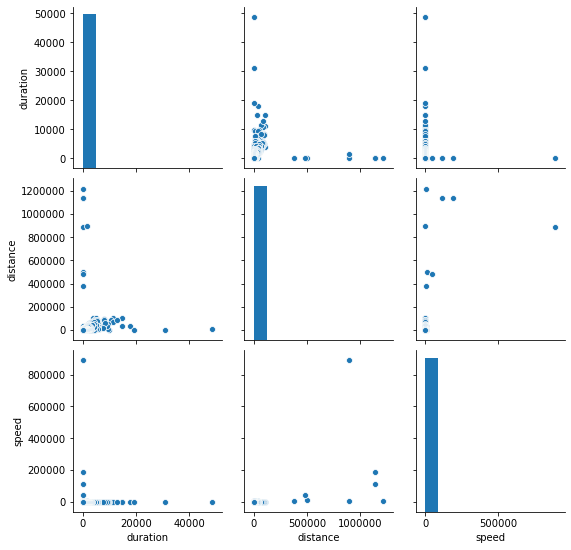

In [22]:
sns.pairplot(df_simple)

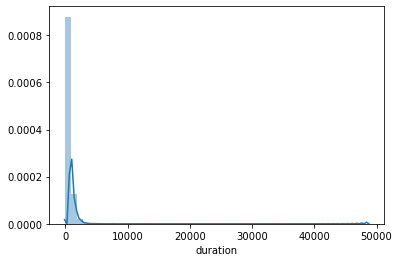

In [23]:
sns.distplot(df_simple['duration'])

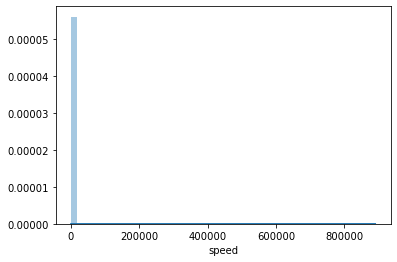

In [24]:
sns.distplot(df_simple['speed'])

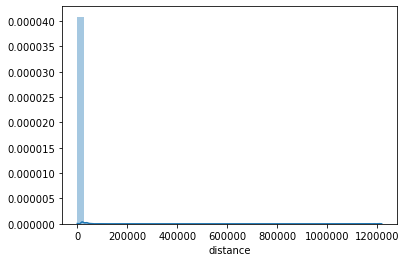

In [25]:
sns.distplot(df_simple['distance'])

When looking at the .describe() and sorting values by descending, there are some heavy outliers in the dataset which unbalanced the mean ; and the std is very high.
It might be useful to drop outliers in order to focus on meaningful data

In [26]:
df_simple.describe()

,duration,distance,speed
count,147530.000000,1.475300e+05,147530.000000
mean,477.770426,2.161331e+03,12.546480
std,571.503371,7.593327e+03,2392.461027
min,1.000000,1.000000e+00,0.000257
25%,103.000000,6.100000e+01,1.142857
50%,294.000000,8.080000e+02,2.856657
75%,676.000000,2.657000e+03,4.398414
max,48654.000000,1.218089e+06,890705.000000


In [27]:
df_simple.sort_values(by='distance', ascending=False)

,duration,distance,speed,distance_type,city_id,type,started_at
37214,199,1218089,6121.050251,road_distance,bravos,going_to_pickup,2016-10-03 18:56:19.263999939
33526,10,1137915,113791.500000,road_distance,bravos,going_to_pickup,2016-10-03 18:21:12.326999903
33646,6,1137902,189650.333333,road_distance,bravos,going_to_pickup,2016-10-03 18:22:06.230999947
89181,1604,892112,556.179551,linear_distance,bravos,going_to_pickup,2016-10-04 05:45:07.062000036
42689,1,890705,890705.000000,linear_distance,bravos,going_to_pickup,2016-10-03 19:42:36.312999964
...,...,...,...,...,...,...,...
30307,18,1,0.055556,road_distance,volantis,waiting_for_rider,2016-10-03 17:49:28.421999931
119662,93,1,0.010753,linear_distance,pentos,waiting_for_rider,2016-10-04 14:42:43.608999968
60632,3,1,0.333333,road_distance,pentos,waiting_for_rider,2016-10-03 22:13:39.516000032
60629,4,1,0.250000,linear_distance,volantis,waiting_for_rider,2016-10-03 22:13:38.818000078


In [28]:
df_simple.sort_values(by='duration', ascending=False)

,duration,distance,speed,distance_type,city_id,type,started_at
74423,48654,4262,0.087598,road_distance,pentos,driving_to_destination,2016-10-04 00:04:48.723999977
80954,31152,38,0.001220,road_distance,pentos,waiting_for_rider,2016-10-04 01:24:17.618000031
79845,19134,848,0.044319,linear_distance,pentos,driving_to_destination,2016-10-04 01:08:58.395999908
40595,17903,33913,1.894264,linear_distance,volantis,driving_to_destination,2016-10-03 19:25:05.216000080
7971,14903,100749,6.760317,linear_distance,volantis,driving_to_destination,2016-10-03 14:19:49.667000055
...,...,...,...,...,...,...,...
137877,1,786,786.000000,road_distance,pentos,going_to_pickup,2016-10-04 17:02:18.470000029
81815,1,605,605.000000,road_distance,bravos,going_to_pickup,2016-10-04 01:35:56.565000057
148994,1,3349,3349.000000,linear_distance,pentos,going_to_pickup,2016-10-04 18:33:07.588000059
29110,1,2204,2204.000000,linear_distance,bravos,going_to_pickup,2016-10-03 17:38:35.196000099


Using Z-Score in order for each row to measure its distance from the mean.

it might be useful to calculate the Z-Score both for duration & distance, in order to pin point values which are the furthest from the mean (i.e. z-score > 3) and drop those values

In [29]:
df_simple['z_score_duration'] = (df_simple.duration - df_simple.duration.mean()) / df_simple.duration.std(ddof=0)

<ipython-input-29-7f0ada14bbea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['z_score_duration'] = (df_simple.duration - df_simple.duration.mean()) / df_simple.duration.std(ddof=0)


In [30]:
df_simple['z_score_distance'] = (df_simple.distance - df_simple.distance.mean()) / df_simple.distance.std(ddof=0)

In [31]:
df_simple

,duration,distance,speed,distance_type,city_id,type,started_at,z_score_duration,z_score_distance
0,857,5384,6.282380,linear_distance,pentos,driving_to_destination,2016-10-03 13:00:00.286999941,0.663567,0.424409
1,245,1248,5.093878,road_distance,volantis,going_to_pickup,2016-10-03 13:00:00.852999926,-0.407296,-0.120281
2,1249,5847,4.681345,road_distance,pentos,driving_to_destination,2016-10-03 13:00:01.670000076,1.349480,0.485384
3,471,2585,5.488323,linear_distance,bravos,going_to_pickup,2016-10-03 13:00:01.841000080,-0.011847,0.055795
4,182,743,4.082418,road_distance,pentos,going_to_pickup,2016-10-03 13:00:01.970000029,-0.517532,-0.186787
...,...,...,...,...,...,...,...,...,...
165120,26,73,2.807692,linear_distance,volantis,waiting_for_rider,2016-10-04 20:34:57.698999882,-0.790497,-0.275023
165125,32,49,1.531250,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:03.744999886,-0.779999,-0.278184
165139,8,3,0.375000,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:33.029000044,-0.821993,-0.284242
165148,13,26,2.000000,road_distance,volantis,waiting_for_rider,2016-10-04 20:35:46.073999882,-0.813245,-0.281213


In [32]:
# df_test.apply(zscore)

In [33]:
#creating new DF with Z-score < 3 to keep only relevant data
# Get rid of ~2.5K rows of outlier data

df_simple_Z3 = df_simple[(df_simple['z_score_duration'] < 3) & (df_simple['z_score_distance'] < 3)]

In [34]:
df_simple_Z3

,duration,distance,speed,distance_type,city_id,type,started_at,z_score_duration,z_score_distance
0,857,5384,6.282380,linear_distance,pentos,driving_to_destination,2016-10-03 13:00:00.286999941,0.663567,0.424409
1,245,1248,5.093878,road_distance,volantis,going_to_pickup,2016-10-03 13:00:00.852999926,-0.407296,-0.120281
2,1249,5847,4.681345,road_distance,pentos,driving_to_destination,2016-10-03 13:00:01.670000076,1.349480,0.485384
3,471,2585,5.488323,linear_distance,bravos,going_to_pickup,2016-10-03 13:00:01.841000080,-0.011847,0.055795
4,182,743,4.082418,road_distance,pentos,going_to_pickup,2016-10-03 13:00:01.970000029,-0.517532,-0.186787
...,...,...,...,...,...,...,...,...,...
165120,26,73,2.807692,linear_distance,volantis,waiting_for_rider,2016-10-04 20:34:57.698999882,-0.790497,-0.275023
165125,32,49,1.531250,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:03.744999886,-0.779999,-0.278184
165139,8,3,0.375000,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:33.029000044,-0.821993,-0.284242
165148,13,26,2.000000,road_distance,volantis,waiting_for_rider,2016-10-04 20:35:46.073999882,-0.813245,-0.281213


In [35]:
#doing new .describe to check on values. Still important std for duration & distance
df_simple_Z3.describe()

,duration,distance,speed,z_score_duration,z_score_distance
count,145185.000000,145185.000000,145185.000000,145185.000000,145185.000000
mean,439.223618,1838.239302,3.960251,-0.067448,-0.042550
std,445.479616,2695.695918,28.797939,0.779490,0.355010
min,1.000000,1.000000,0.000962,-0.834242,-0.284505
25%,101.000000,57.000000,1.111670,-0.659264,-0.277130
50%,287.000000,779.000000,2.825939,-0.333806,-0.182046
75%,649.000000,2528.000000,4.354180,0.299614,0.048288
max,2192.000000,24779.000000,3349.000000,2.999519,2.978634


In [36]:
#Checking different Trip Type value counts
df_simple_Z3.type.value_counts()

going_to_pickup           56577
driving_to_destination    49669
waiting_for_rider         38939
Name: type, dtype: int64

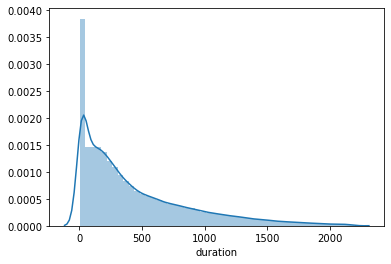

In [37]:
sns.distplot(df_simple_Z3.duration)

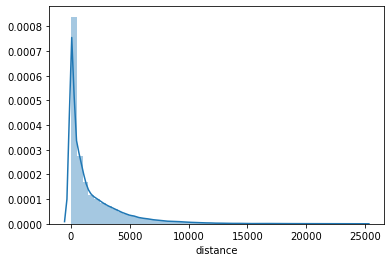

In [38]:
sns.distplot(df_simple_Z3.distance)

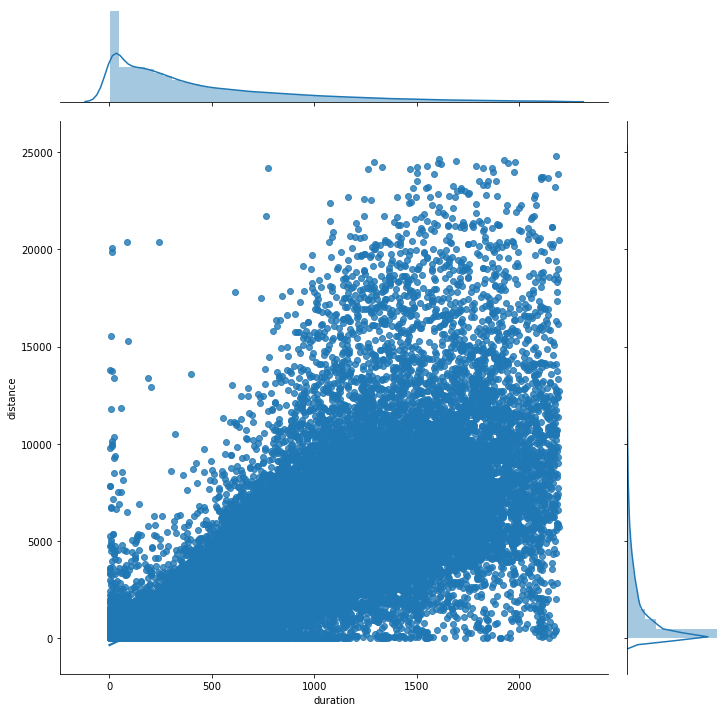

In [39]:
# doing a jointplot to evaluate the dispersion of values & their correlation

sns.jointplot(x='duration', y='distance', height =10, data=df_simple_Z3, kind="reg")

- Unsurprisingly, there is a strong correlation between distance & duration
- Most of Rides take place within 20K meters

In [40]:
#Checking Repartition of Cities in value counts
df_simple_Z3.city_id.value_counts()

pentos      101905
volantis     30224
bravos       13056
Name: city_id, dtype: int64

In [41]:
#Grouping by Both Cities & Distances, in order to measure whether speed, duration & distance
# vary greatly when comparing distance_types Road VS. Linear

df_simple_Z3_grouped = df_simple_Z3.groupby(['city_id','distance_type']).agg({'speed':['mean','min','max'], 'duration':'mean', 'distance':'mean'})

In [42]:
df_simple_Z3_grouped

speed                           duration  \
                              mean       min          max        mean   
city_id  distance_type                                                  
bravos   linear_distance  7.072209  0.001014  2204.000000  627.906189   
         road_distance    6.960439  0.001629  1953.250000  623.729452   
pentos   linear_distance  3.477354  0.001647  3349.000000  400.971309   
         road_distance    3.543427  0.001618  3294.000000  399.593879   
volantis linear_distance  4.190518  0.001100  1968.166667  493.624632   
         road_distance    4.111907  0.000962  2442.500000  487.883220   

                             distance  
                                 mean  
city_id  distance_type                 
bravos   linear_distance  2921.912890  
         road_distance    2947.619228  
pentos   linear_distance  1646.266439  
         road_distance    1645.763202  
volantis linear_distance  2019.130593  
         road_distance    2006.790477

When looking at differences between two types of Distance calculation per city, speed, duration & distance are relatively equal for Pentos & Volantis

For Bravos on the other hand, there's an important speed difference between the two types of distances

### Checking for Rush hour during the day 

The dataset is a 5-day period long so it is hard to measure yearly seasonality.

But one may assume that there are regular rush hour during the day, therefore it may be interesting to isolate through rush hours to measure hypothetical peaks

In [43]:
df_simple_Z3.dtypes

duration                     int64
distance                     int64
speed                      float64
distance_type               object
city_id                     object
type                        object
started_at          datetime64[ns]
z_score_duration           float64
z_score_distance           float64
dtype: object

In [44]:
#Creating new columns for Date & Time, in order to measure whether there might have strong "seasonality" bias 
# (i.e. rush hours during the day where trafic impact greatly the road distance time)

df_simple_Z3['date_started_at'] = pd.to_datetime(df_simple_Z3['started_at']).dt.date

df_simple_Z3['hour'] = pd.to_datetime(df_simple_Z3['started_at']).dt.hour

<ipython-input-44-54813fbf3b8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple_Z3['date_started_at'] = pd.to_datetime(df_simple_Z3['started_at']).dt.date
<ipython-input-44-54813fbf3b8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple_Z3['hour'] = pd.to_datetime(df_simple_Z3['started_at']).dt.hour


In [45]:
df_simple_Z3['date_started_at'] = pd.to_datetime(df_simple_Z3['date_started_at'])

<ipython-input-45-455009f3b598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple_Z3['date_started_at'] = pd.to_datetime(df_simple_Z3['date_started_at'])


In [46]:
df_simple_Z3.dtypes

duration                     int64
distance                     int64
speed                      float64
distance_type               object
city_id                     object
type                        object
started_at          datetime64[ns]
z_score_duration           float64
z_score_distance           float64
date_started_at     datetime64[ns]
hour                         int64
dtype: object

In [47]:
df_simple_Z3

,duration,distance,speed,distance_type,city_id,type,started_at,z_score_duration,z_score_distance,date_started_at,hour
0,857,5384,6.282380,linear_distance,pentos,driving_to_destination,2016-10-03 13:00:00.286999941,0.663567,0.424409,2016-10-03,13
1,245,1248,5.093878,road_distance,volantis,going_to_pickup,2016-10-03 13:00:00.852999926,-0.407296,-0.120281,2016-10-03,13
2,1249,5847,4.681345,road_distance,pentos,driving_to_destination,2016-10-03 13:00:01.670000076,1.349480,0.485384,2016-10-03,13
3,471,2585,5.488323,linear_distance,bravos,going_to_pickup,2016-10-03 13:00:01.841000080,-0.011847,0.055795,2016-10-03,13
4,182,743,4.082418,road_distance,pentos,going_to_pickup,2016-10-03 13:00:01.970000029,-0.517532,-0.186787,2016-10-03,13
...,...,...,...,...,...,...,...,...,...,...,...
165120,26,73,2.807692,linear_distance,volantis,waiting_for_rider,2016-10-04 20:34:57.698999882,-0.790497,-0.275023,2016-10-04,20
165125,32,49,1.531250,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:03.744999886,-0.779999,-0.278184,2016-10-04,20
165139,8,3,0.375000,linear_distance,volantis,waiting_for_rider,2016-10-04 20:35:33.029000044,-0.821993,-0.284242,2016-10-04,20
165148,13,26,2.000000,road_distance,volantis,waiting_for_rider,2016-10-04 20:35:46.073999882,-0.813245,-0.281213,2016-10-04,20


Since we have seen there a re strong differences between the 3 studied cities, let's  create a separated DF for each city in order to measure their respective time 

In [48]:
df_bravos = df_simple_Z3[df_simple_Z3['city_id'] == 'bravos']

df_volantis = df_simple_Z3[df_simple_Z3['city_id'] == 'volantis']

df_pentos = df_simple_Z3[df_simple_Z3['city_id'] == 'pentos']

We may create barplots in order to measure, hour by hour, eventual peaks of speed & great differences between 2 Distance systems

Text(0.5, 1.0, 'Bravos - speed variation VS. distance type')

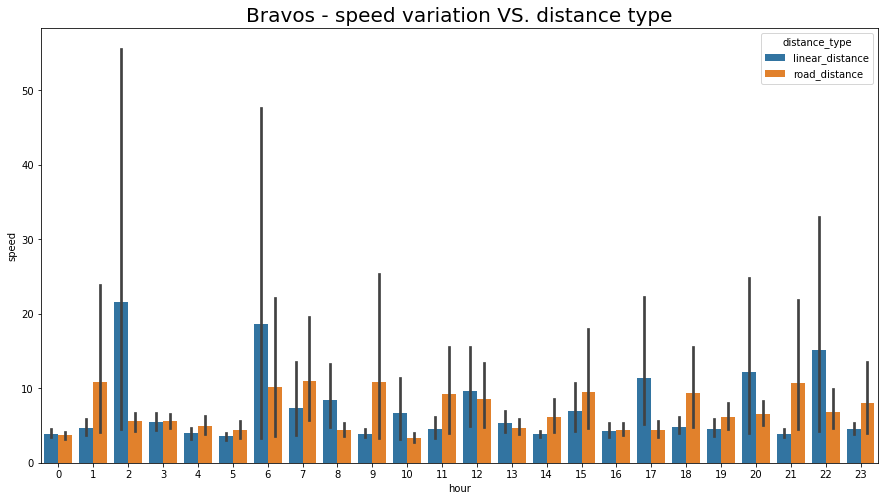

In [49]:
figure_title = "Bravos - speed variation VS. distance type"

plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='speed', hue='distance_type', data=df_bravos)

plt.title(figure_title, fontsize = 20)

Text(0.5, 1.0, 'Volantis - speed variation VS. distance type')

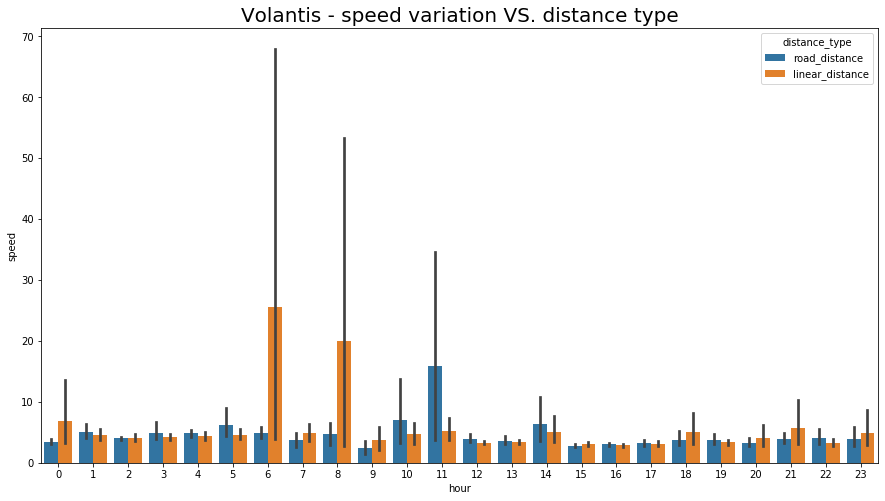

In [50]:
figure_title = "Volantis - speed variation VS. distance type"

plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='speed', hue='distance_type', data=df_volantis)

plt.title(figure_title, fontsize = 20)

Text(0.5, 1.0, 'Pentos - speed variation VS. distance type')

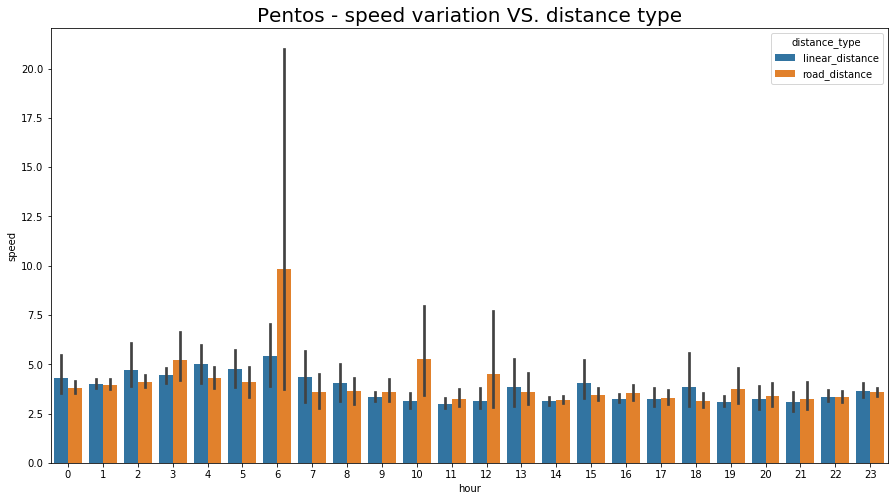

In [51]:
figure_title = "Pentos - speed variation VS. distance type"

plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='speed', hue='distance_type', data=df_pentos)

plt.title(figure_title, fontsize = 20)

**Challenge**
Try to answer the following questions:

**Question#1**
Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)


- Difference between Road & Linear distances present great differences depending on the analyzed city, and the hour of the day

Since the API calls are paid ones, it might be interesting to use them when there is a gret difference between both counting systems :
It is for Bravos that the impact would be the greatest
- for Bravos, at 1h, 7h, 9h, 11h, 15h, 18h & 21h the speed variation is greatly increased when using the road distance system
- for Volantis, at 6h & 8h the speed variation is greatly increased when using the road distance system
- for Pentos, at 6h the speed variation is greatly increased when using the road distance system

**Question#2**
How would you improve the experimental design? Would you collect any additional data?

- Getting more data would help to measure eventual seasonal peaks during the year
- Analyzing patterns over a 7-day period (to include week-end days), 30-day period (4 week analysis) and 365-day period may allow to get more insights over clients habbits, and the collected ata would have less chance of being exposed to extreme values
(because the current dataset used of a 5-day period may absolutely not represent a normal 5-day period and have extreme values)

- Moreover, having geolocated data may increase the accuracy of the calculation. i.e. for each city knowing where the rides is being done may impact greatly the speed.
- If the ride is done in a city downtown, with plenty of traffic & traffic lights, optimizing the ride may have more impact than in outer districts with less traffic density